# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.
- Goal.

## DATA DESCRIPTION
The data consists of 9134 rows and 24 columns:

- there are 16 categorial columns (one must be changed to datetime though = effective to date)

[Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size']
       
- there are 8 numerical columns:

['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']


## GOAL
The goal of this analysis is to find a linear regression model which is as accurate as possible to predict the total claim amount based on different features (which are relevant for the prediction).

In [1]:
#importing all the important packages which might have to be used

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder

import statsmodels.api as sm
from statsmodels.formula.api import ols


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import os

import warnings
warnings.filterwarnings('ignore')

## 02 - Getting Data

Read the .csv file.

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [3]:
#changing the column headers names (lower letters + no spaces)

data.columns = [col.lower().replace(' ','_') for col in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [4]:
#remaning column which is missing space
data = data.rename(columns={'employmentstatus':'employement_status'})

In [5]:
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employement_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
#checking for null values --> none = no further action needed
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employement_status               0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
'''
code to drop null values:
data['state'].dropna() --> only for one column

code to replace null values:
data['state'].fillna(mean) --> only for one column

'''

"\ncode to drop null values:\ndata['state'].dropna() --> only for one column\n\ncode to replace null values:\ndata['state'].fillna(mean) --> only for one column\n\n"

In [8]:
#changing column type to datetime for effective to month

data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [9]:
#checking for data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employement_status             9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

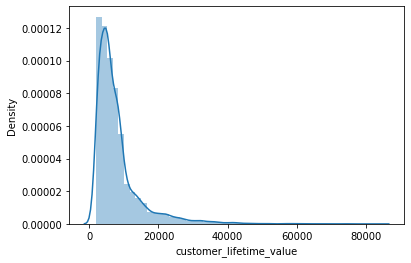

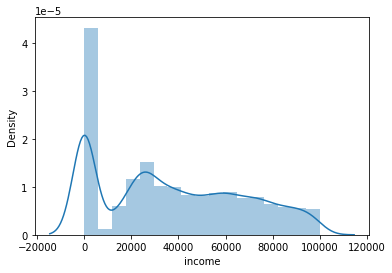

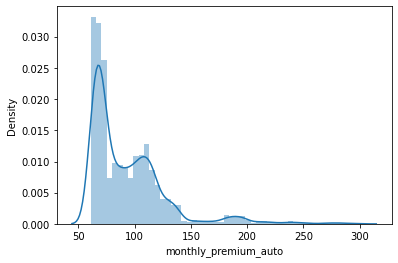

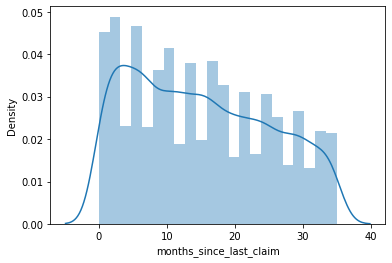

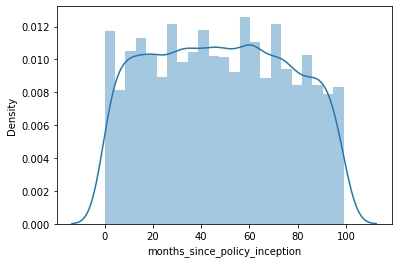

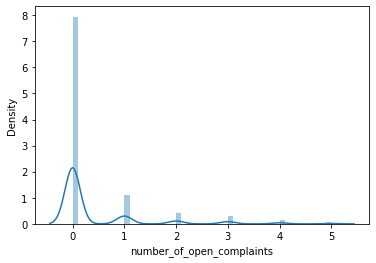

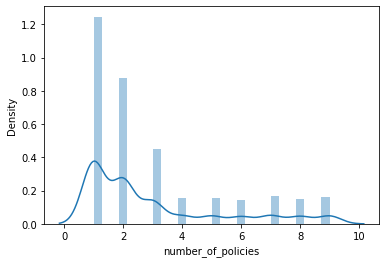

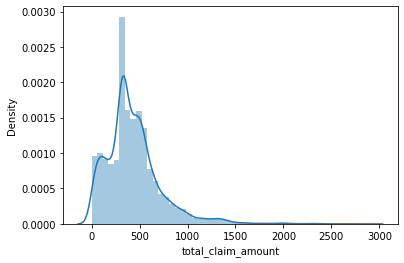

In [10]:
#checking out distribution of numerical columns
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

In [11]:
#getting an overview of numerical data + adding iqr to summary

summary = data.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,9134.0,8005.0,6871.0,1898.0,3994.0,5780.0,8962.0,83325.0,4968.0
income,9134.0,37657.0,30380.0,0.0,0.0,33890.0,62320.0,99981.0,62320.0
monthly_premium_auto,9134.0,93.0,34.0,61.0,68.0,83.0,109.0,298.0,41.0
months_since_last_claim,9134.0,15.0,10.0,0.0,6.0,14.0,23.0,35.0,17.0
months_since_policy_inception,9134.0,48.0,28.0,0.0,24.0,48.0,71.0,99.0,47.0
number_of_open_complaints,9134.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
number_of_policies,9134.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0,3.0
total_claim_amount,9134.0,434.0,291.0,0.0,272.0,384.0,548.0,2893.0,275.0


In [12]:
#checking correlation of numerical data

correlations_matrix = data.corr()  
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


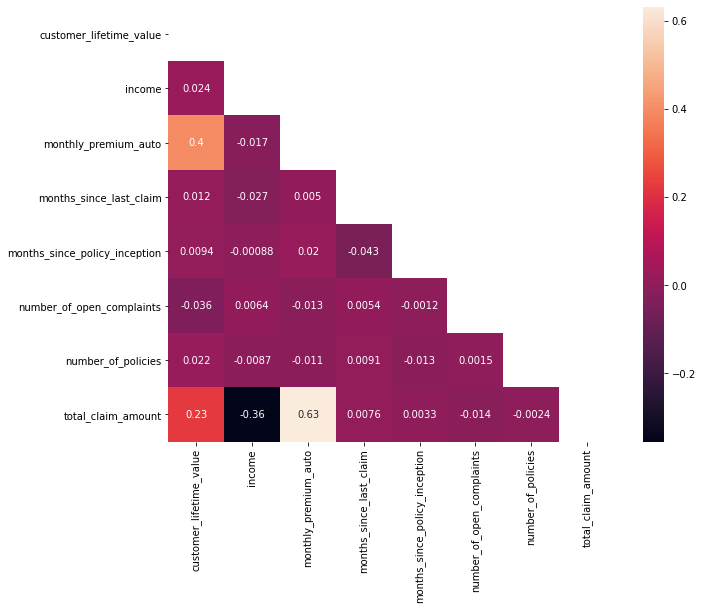

In [13]:
#showing correlation in a heatmat

mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

### Insights after exploration
- most numerical features are not distributed normally --> normalization will be necessary
- no high correlation = no numerical column needs to be dropped
- customer lifetime value and income have a lot higher values in comparison to others (normalizing data might be better than standardization)


## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

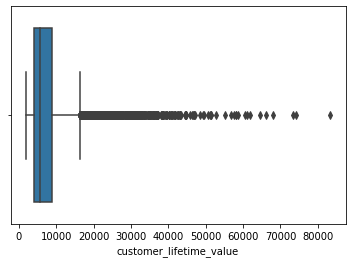

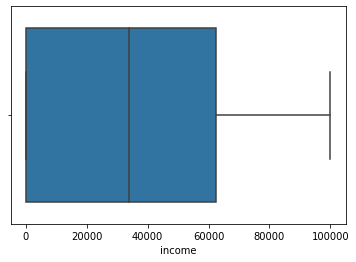

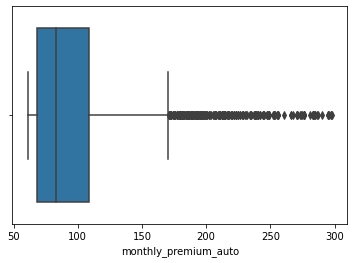

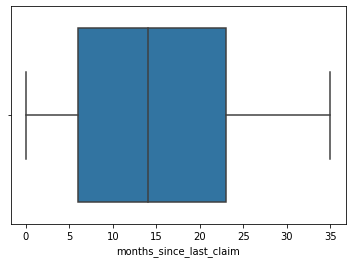

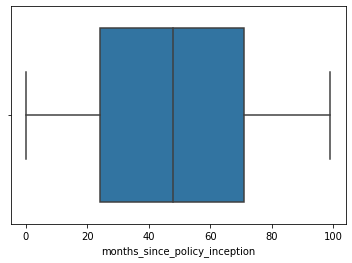

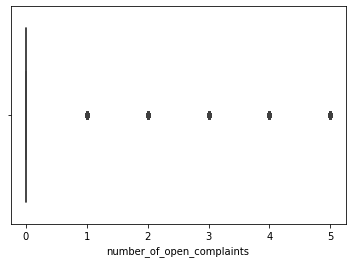

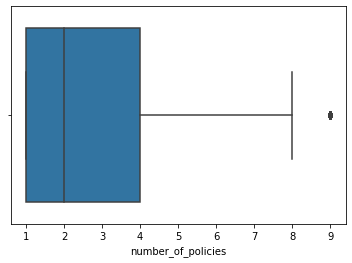

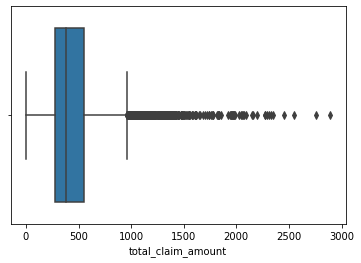

In [14]:
#checking for outliers via boxplots

for col in data.select_dtypes(np.number).columns:
    sns.boxplot(data[col])
    plt.show()

--> many outliers for total claim amount (target), monthly premium auto and customer lifetime value

In [15]:
#removing outliers via boxcox transformation
#defining a function for boxcox transformation

def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [16]:
#applying function for boxcox transformation on data
data, _ci = boxcox_transform(data)
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employement_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.703839,No,Basic,Bachelor,2011-02-24,Employed,F,1247.937066,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,QZ44356,Arizona,2.754926,No,Extended,Bachelor,2011-01-31,Unemployed,F,1167.961720,...,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,AI49188,Nevada,2.780772,No,Premium,Bachelor,2011-02-19,Employed,F,1144.063081,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,WW63253,California,2.759125,No,Basic,Bachelor,2011-01-20,Unemployed,M,1167.961720,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,HB64268,Washington,2.704995,No,Basic,Bachelor,2011-02-03,Employed,M,1072.375744,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,2.801170,No,Basic,Bachelor,2011-02-10,Employed,M,1448.531450,...,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize
9130,PK87824,California,2.711030,Yes,Extended,College,2011-02-12,Employed,F,697.790558,...,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize
9131,TD14365,California,2.762062,No,Extended,Bachelor,2011-02-06,Unemployed,M,1167.961720,...,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize
9132,UP19263,California,2.758397,No,Extended,College,2011-02-03,Employed,M,704.383672,...,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,44.225147,Four-Door Car,Large


In [17]:
_ci

{'customer_lifetime_value': [-0.3460077279198611],
 'income': [0.606136983521106],
 'monthly_premium_auto': [-1.4560475713521648],
 'months_since_last_claim': [0.5692435567708527],
 'months_since_policy_inception': [0.7136590106846658],
 'number_of_open_complaints': [0.12272161798485684],
 'number_of_policies': [-0.39015686286007867],
 'total_claim_amount': [0.4718167582845637]}

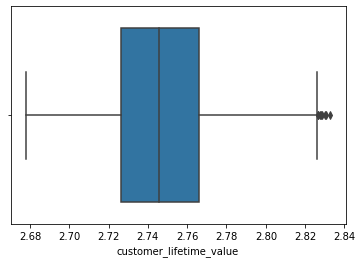

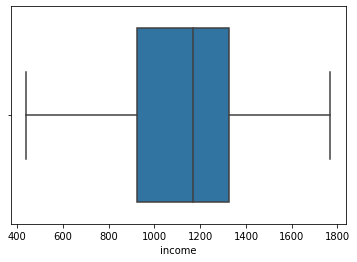

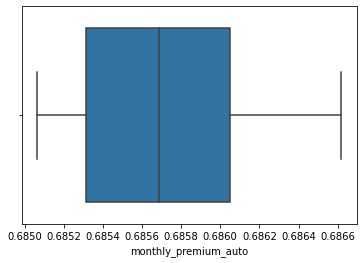

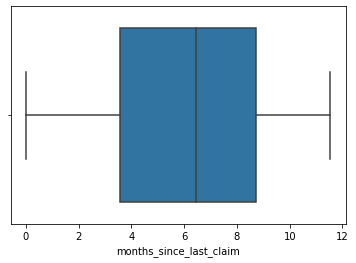

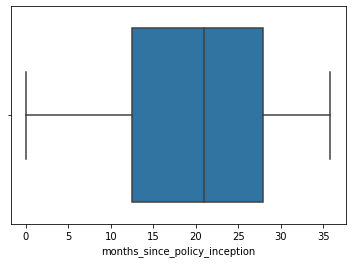

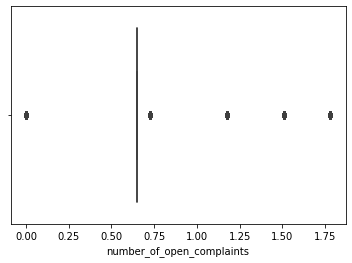

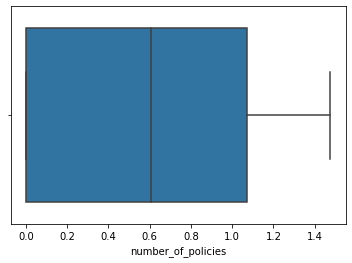

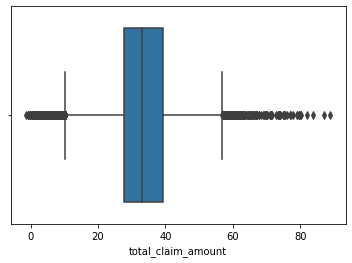

In [18]:
#checking for outliers via boxplots after boxcox transformation

for col in data.select_dtypes(np.number).columns:
    sns.boxplot(data[col])
    plt.show()

--> will remove outliers via manual function

In [19]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employement_status               0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [20]:
#defining function to remove outliers

def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=['total_claim_amount']):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]<upper_limit)] #using only upper limit as outliers are only in upper limit and otherswise funtion doesn't work 
    return data

In [21]:
#removing outliers via function

#creating a copy of data frame to make sure not to many rows (data) will be lost after removing outliers
data1 = data.copy()

data1 = remove_outliers(data1, threshold=1.5, skip_columns=['total_claim_amount']) #can we change the target column or not?

data1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employement_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
13,SJ95423,Arizona,2.765437,Yes,Basic,High School or Below,2011-01-10,Employed,M,1767.260434,...,12.535528,0.0,1.424359,Corporate Auto,Corporate L3,Offer2,Branch,38.694701,SUV,Medsize
15,BW63560,Oregon,2.758024,No,Basic,Bachelor,2011-01-17,Employed,F,755.055334,...,21.454469,0.0,0.607328,Corporate Auto,Corporate L2,Offer2,Branch,10.370007,Four-Door Car,Medsize
29,EJ77678,Oregon,2.713727,No,Extended,Master,2011-02-07,Employed,F,1493.879414,...,19.461641,0.0,0.000000,Personal Auto,Personal L3,Offer2,Branch,33.000769,Four-Door Car,Small
30,SV85652,Arizona,2.696040,No,Basic,College,2011-02-28,Employed,M,727.868095,...,3.631967,0.0,0.000000,Personal Auto,Personal L2,Offer4,Call Center,30.214731,Four-Door Car,Small
40,QG25316,Nevada,2.701167,No,Basic,High School or Below,2011-01-18,Unemployed,F,1167.961720,...,0.000000,0.0,0.000000,Corporate Auto,Corporate L3,Offer3,Call Center,37.065229,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9083,UY32623,California,2.720013,No,Extended,College,2011-02-05,Disabled,F,629.022862,...,19.122143,0.0,0.000000,Corporate Auto,Corporate L2,Offer1,Branch,36.155644,Four-Door Car,Large
9085,WL28610,California,2.728237,No,Basic,High School or Below,2011-01-01,Unemployed,F,1167.961720,...,3.017887,0.0,0.000000,Corporate Auto,Corporate L3,Offer3,Branch,39.730348,SUV,Medsize
9087,GV76798,California,2.736029,No,Premium,Master,2011-01-24,Employed,F,858.010287,...,20.798220,0.0,0.000000,Personal Auto,Personal L2,Offer2,Branch,32.535140,Four-Door Car,Medsize
9111,IJ25462,California,2.705715,No,Basic,Bachelor,2011-02-07,Employed,M,1621.414163,...,19.461641,0.0,0.000000,Personal Auto,Personal L2,Offer3,Agent,33.718911,Four-Door Car,Small


--> removing outliers made us loose 8000 rows = this cost us too much data

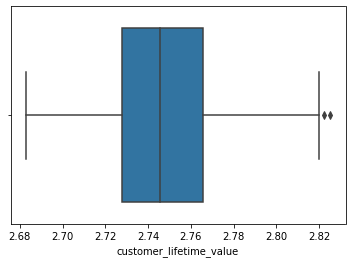

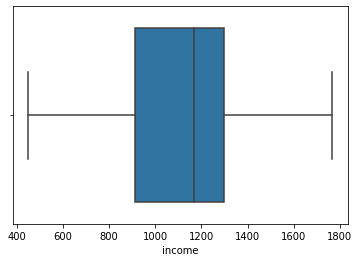

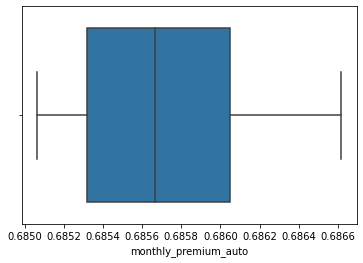

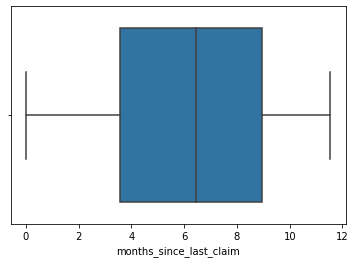

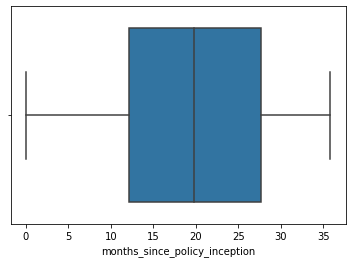

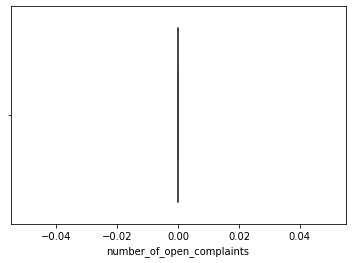

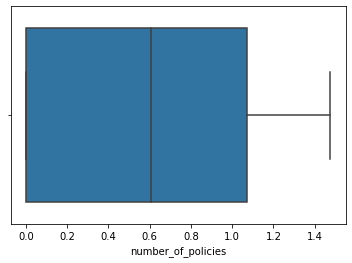

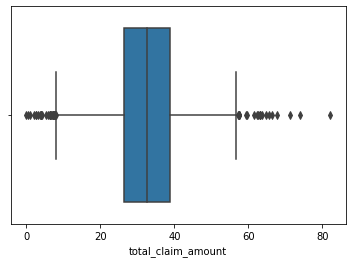

In [22]:
#checking for outliers via boxplots after removing outliers

for col in data1.select_dtypes(np.number).columns:
    sns.boxplot(data1[col])
    plt.show()

- why did the boxplot of total claim amount change although it should have been skipped?
- boxplot also looks different for "data" (see next line) compared to boxplot which was made with data after boxcox transformation, why did it change? before there were no outliers on the lower limit

<AxesSubplot:xlabel='total_claim_amount'>

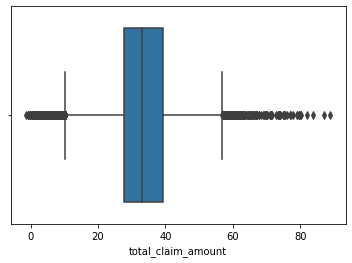

In [23]:
sns.boxplot(data['total_claim_amount'])

In [24]:
#defining another funtion to cut of outliers at limits instead of removing them --> function doesn't work, why?

def cutting_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = [(data.loc[data[column] > upper_limit, column] = upper_limit] & [data.loc[data[column] < lower_limit, column] = lower_limit)]
    return data

SyntaxError: invalid syntax (<ipython-input-24-69cc5da8460c>, line 11)

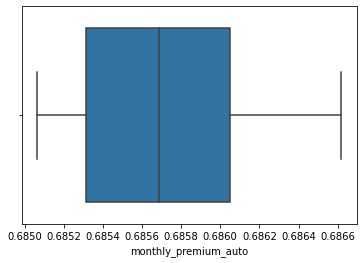

In [25]:
#cutting of outliers manually monthly premium auto instead (a few outliers left)

#calculating iqr for monthly premium auto
iqr_auto = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)

upper_limit_auto = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr_auto
lower_limit_auto = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr_auto

#rcutting of outliers
data.loc[data['monthly_premium_auto'] > upper_limit_auto, 'monthly_premium_auto'] = upper_limit_auto
data.loc[data['monthly_premium_auto'] < lower_limit_auto, 'monthly_premium_auto'] = lower_limit_auto

#checking boxplot again
sns.boxplot(data['monthly_premium_auto'])
plt.show()

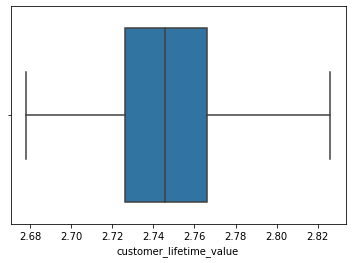

In [26]:
#cutting of outliers manually for customer lifetime value (a few outliers left)

#calculating iqr for customer lifetime value
iqr_auto = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)

upper_limit_auto = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr_auto
lower_limit_auto = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr_auto

#rcutting of outliers
data.loc[data['customer_lifetime_value'] > upper_limit_auto, 'customer_lifetime_value'] = upper_limit_auto
data.loc[data['customer_lifetime_value'] < lower_limit_auto, 'customer_lifetime_value'] = lower_limit_auto

#checking boxplot again
sns.boxplot(data['customer_lifetime_value'])
plt.show()

In [27]:
#splitting up categorical and numerical data into two different dataframes
cat = data.select_dtypes('object')
num = data.select_dtypes(np.number)

In [28]:
#removing target column before normalizing data
num = num.drop('total_claim_amount', axis=1)

In [29]:
#normalizing numerical data

import pickle #what do we need this for??

transformer = Normalizer()
transformer.fit(num) 

with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

num_norm = transformer.transform(num)

num_normalized = pd.DataFrame(num_norm)
num_normalized

,0,1,2,3,4,5,6
0,0.002167,0.999956,0.000549,0.008715,0.002418,0.000519,0.000000
1,0.002358,0.999855,0.000587,0.004972,0.016077,0.000555,0.001219
2,0.002430,0.999860,0.000600,0.006422,0.015197,0.000566,0.000531
3,0.002362,0.999726,0.000587,0.006289,0.022393,0.000555,0.001167
4,0.002522,0.999819,0.000639,0.005101,0.018145,0.000604,0.000000
...,...,...,...,...,...,...,...
9129,0.001933,0.999724,0.000473,0.005071,0.022838,0.000447,0.000419
9130,0.003884,0.999760,0.000982,0.008789,0.019642,0.000928,0.000000
9131,0.002365,0.999883,0.000587,0.003749,0.014583,0.001007,0.000520
9132,0.003915,0.999859,0.000974,0.016068,0.002368,0.000920,0.001268


In [30]:
#checking on num column names to replace them in normalized dataframe
num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

In [31]:
#replacing column names in num_normalized

cols = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies']

num_normalized.columns = cols
num_normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.002167,0.999956,0.000549,0.008715,0.002418,0.000519,0.000000
1,0.002358,0.999855,0.000587,0.004972,0.016077,0.000555,0.001219
2,0.002430,0.999860,0.000600,0.006422,0.015197,0.000566,0.000531
3,0.002362,0.999726,0.000587,0.006289,0.022393,0.000555,0.001167
4,0.002522,0.999819,0.000639,0.005101,0.018145,0.000604,0.000000
...,...,...,...,...,...,...,...
9129,0.001933,0.999724,0.000473,0.005071,0.022838,0.000447,0.000419
9130,0.003884,0.999760,0.000982,0.008789,0.019642,0.000928,0.000000
9131,0.002365,0.999883,0.000587,0.003749,0.014583,0.001007,0.000520
9132,0.003915,0.999859,0.000974,0.016068,0.002368,0.000920,0.001268


In [32]:
#checking out unique values + value counts for categorical columns

for column in cat.columns:
    print(column, cat[column].value_counts())

customer LF94282    1
LY30169    1
TC78849    1
SO38188    1
PH77560    1
          ..
YX54093    1
QW47320    1
NY20756    1
SZ14518    1
UK76891    1
Name: customer, Length: 9134, dtype: int64
state California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
response No     7826
Yes    1308
Name: response, dtype: int64
coverage Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
education Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
employement_status Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employement_status, dtype: int64
gender F    4658
M    4476
Name: gender, dtype: int64
location_code Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
marital_status Marrie

### changes which could be made to reduce number of columns after encoding

#### must:
- drop column customer (only unique values)

#### maybe:
- education: merging Master + Doctor to 'More than College'
- coverage: merging Extended + Premium to 'More than Basic'
- employment status: Medical Leave + Disabled + Retired to 'Other'
- policy: could be merged when having more knowledge about the different policies
- vehicle class: merging Sports Car + Luxury Car + Luxury SUV to 'Sport or Luxury'

In [33]:
#dropping column customer

cat = cat.drop('customer', axis=1)
cat.columns

Index(['state', 'response', 'coverage', 'education', 'employement_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [34]:
#will encode categorical columns by get dummies

cat = pd.get_dummies(cat, drop_first=True)
cat

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [35]:
#concatenating categorical (encoded) and numerical (normalized) data frames
X = pd.concat([num_normalized, cat], axis=1)

#creating target variable
y = data['total_claim_amount']

In [36]:
#train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [37]:
#checking out model with pre-normalized data (numerical)

data_clean = pd.read_csv('marketing_customer_analysis.csv')
numerical = data_clean.select_dtypes(np.number)
numerical = numerical.drop('Total Claim Amount', axis=1)


numerical = sm.add_constant(numerical)

model_0 = sm.OLS(y,numerical).fit()

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     945.2
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:53:52   Log-Likelihood:                -32985.
No. Observations:                9134   AIC:                         6.599e+04
Df Residuals:                    9126   BIC:                         6.604e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [38]:
#checking out model with cleaned numerical data (boxcox transformation + outliers cut of)

num = sm.add_constant(num)

model_1 = sm.OLS(y,num).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     492.9
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:53:52   Log-Likelihood:                -34010.
No. Observations:                9134   AIC:                         6.804e+04
Df Residuals:                    9126   BIC:                         6.809e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### ==> how come the R2 is lower for cleaned or normalized data than for pre-cleaned data?? (see above and below)

In [39]:
#checking out model with normalized numerical data

num_normalized = sm.add_constant(num_normalized)

model_2 = sm.OLS(y,num_normalized).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     98.32
Date:                Tue, 15 Jun 2021   Prob (F-statistic):          4.61e-139
Time:                        16:53:53   Log-Likelihood:                -35143.
No. Observations:                9134   AIC:                         7.030e+04
Df Residuals:                    9126   BIC:                         7.036e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [40]:
#checking out model with encoded data

cat = sm.add_constant(cat)

model_3 = sm.OLS(y,cat).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1024.
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:53:54   Log-Likelihood:                -27501.
No. Observations:                9134   AIC:                         5.509e+04
Df Residuals:                    9091   BIC:                         5.539e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [41]:
#checking out model with encoded + normalized data

X = sm.add_constant(X)

model_4 = sm.OLS(y,X).fit()

print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     880.9
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:53:54   Log-Likelihood:                -27485.
No. Observations:                9134   AIC:                         5.507e+04
Df Residuals:                    9084   BIC:                         5.543e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [42]:
#columns with a high p-value which can be removed (p-value > 0.6) 
X1 = X.drop(['vehicle_size_Medsize', 'vehicle_class_Two-Door Car', 'sales_channel_Call Center', 'policy_Special L3', 'policy_Special L2', 'policy_Special L1',
            'policy_Personal L3', 'policy_Personal L2', 'policy_Personal L1', 'policy_type_Special Auto', 'policy_type_Personal Auto', 
            'employement_status_Retired', 'employement_status_Employed', 'state_Nevada', 'state_Oregon', ], axis=1)

In [43]:
#checking out model with encoded + normalized data (after dropping columns)

X1 = sm.add_constant(X1)

model_5 = sm.OLS(y,X1).fit()

print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     1234.
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:53:55   Log-Likelihood:                -27490.
No. Observations:                9134   AIC:                         5.505e+04
Df Residuals:                    9098   BIC:                         5.531e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [44]:
X = X1

## 05 - Modeling

Apply model.

In [45]:
#linear regression
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
predictions = model_reg.predict(X_test)

## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [47]:
#showing R2
r2 = r2_score(y_test, predictions)
print('R2 score is ', r2)

R2 score is  0.8222216325685751


In [48]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['total_claim_amount'])

In [49]:
#showing MSE
mse = mean_squared_error(y_test, predictions, squared=True)
print('MSE score is ', mse)

MSE score is  207448.59832556592


In [50]:
#showning RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print('RMSE score is ', rmse)

RMSE score is  455.46525479510063


In [51]:
#showing MAE
mae = mean_absolute_error(y_test, predictions)
print('MAE score is ', mae)

MAE score is  389.8282047256052


## 07 - Reporting

Present results.

In [54]:
import math

#showing results: predictions vs actual values vs difference(residuals)
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
791,42.248087,57.560218,15.312131
1822,151.843731,58.027469,93.816262
4908,148.778455,53.190588,95.587867
9100,460.800000,471.568951,10.768951
6403,1080.559002,744.078954,336.480048
...,...,...,...
167,292.800000,472.467287,179.667287
6819,580.800000,668.675492,87.875492
7319,96.338144,196.739277,100.401133
4271,518.400000,609.922775,91.522775


In [55]:
#showing overview of statistics of results
results.describe().T

,count,mean,std,min,25%,50%,75%,max
true,2741.0,431.460899,290.986933,0.382107,262.865172,379.200000,550.127548,2452.894264
pred,2741.0,422.588656,246.274197,40.540155,254.035160,414.647723,556.773881,1609.574656
resid,2741.0,86.302281,94.713209,0.047805,31.663831,62.031854,106.565258,1078.269076


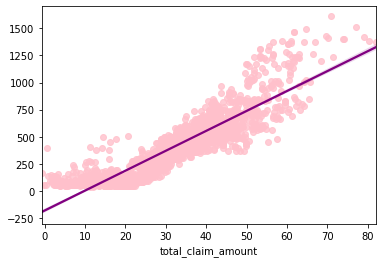

In [79]:
#showing relationship between y_test and predictions --> visualization of regression line and accuracy of the model?
sns.regplot(y_test, predictions, scatter_kws={'color' : 'pink'}, line_kws={'color' : 'purple'})
plt.show()

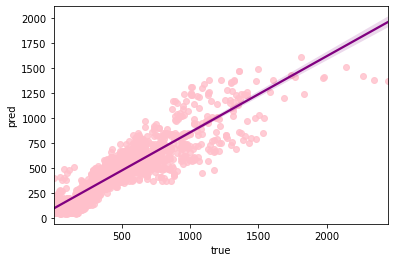

In [80]:
#showing relationship of actual data and residuals (difference to predicted data)
sns.regplot(results['true'], results['pred'], scatter_kws={'color' : 'pink'}, line_kws={'color' : 'purple'})
plt.show()

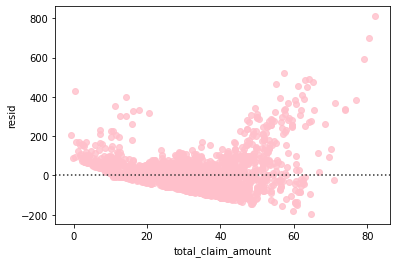

In [81]:
#showing visuals of actual data and residuals (difference to predicted data)
sns.residplot(y_test, results['resid'], scatter_kws={'color' : 'pink'}, line_kws={'color' : 'purple'})
plt.show()

### Results
- the model seems to predict quite well according to the R2 score (0.822)
- looking at residuals the mean is predicted well
- there are huge differences between predition und actual data when looking at the max amount (is this related to not having removed outliers from target variable??)